# KNN

### 4DS1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

__Atelier KNN__
- L'objectif de ce TP est d'étudier le problème de clients qui ont tendance à churner du service de l'entreprise. Les données se présentent dans un fichier CSV contenant 13 "features" et une variable "target"(Exited).Autrement dit, nous aidons l'entreprise à trouver un modèle décisif qui prédit si le client va churner ou pas.

__I- Lecture et chargement des données__

In [ ]:
data = pd.read_csv('churn_problem.csv')

In [ ]:
data.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


__II- Préparation des données__

In [ ]:
data=data.dropna()

On remarque qu'il y a des colonnes qui sont qualitatives alors que le KNN demande des données quantitatives. Donc, il faut faire les transformations nécessaires.

#Encodage de la colonne "Gender"

Il y a des colonnes qui sont non significatives pour notre analyse. Nous devons les supprimer

In [ ]:
print(data['Gender'].unique())

['Female' 'Male']


In [ ]:
data = pd.read_csv('churn_problem.csv')
#1- suppression des colonnes non significatives
#data = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)
data = data.drop(["RowNumber","CustomerId","Surname","Geography"], axis = 1)
#2- encodage des variables
data = pd.get_dummies(data, prefix_sep='_', drop_first=True)

In [ ]:
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0


Une visualisation de la dispersion des observations par rapport aux classes présentes est bien intéressante.

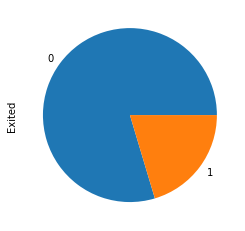

In [ ]:

data['Exited'].value_counts().plot.pie()
plt.show()

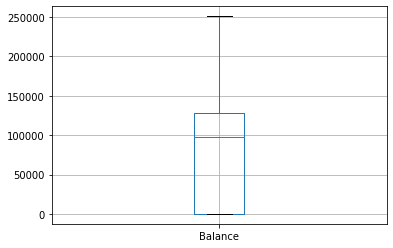

In [ ]:
boxplot = data.boxplot(column=[ 'Balance'])
import matplotlib.pyplot as plt
plt.show()

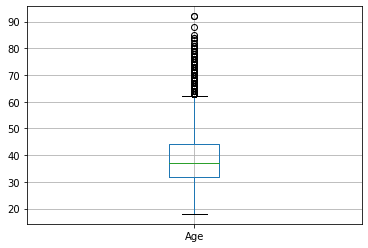

In [ ]:

boxplot = data.boxplot(column=[ 'Age'])
import matplotlib.pyplot as plt
plt.show()

Nous avons détecté qu'il existe des valeurs aberrantes au niveau de quelques colonnes. Nous devons les éliminer

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter1 = (data['Age'] >= Q1 - 1.5 * IQR) & (data['Age'] <= Q3 + 1.5 *IQR)
data=data.loc[filter1]

In [ ]:
data.shape

(9641, 10)

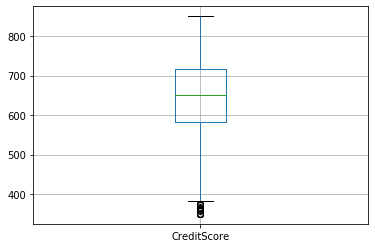

In [ ]:
boxplot = data.boxplot(column=[ 'CreditScore'])
import matplotlib.pyplot as plt
plt.show()

In [ ]:
Q1 = data['CreditScore'].quantile(0.25)
Q3 = data['CreditScore'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (data['CreditScore'] >= Q1 - 1.5 * IQR) & (data['CreditScore'] <= Q3 + 1.5 *IQR)
data=data.loc[filter]

In [ ]:
data.shape

(9627, 10)

__II-Répartition des données__

Maintenant, nous allons répartir nos données en des données de training et des données de test.

In [ ]:
#1- diviser le dataset en 2 : Features(X) + label(y)
X= data.drop(['Exited'],axis=1)
y= pd.factorize(data['Exited'])[0]
#2- diviser le dataset en 2 : trainset + testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Centrage-Réduction des données

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

__IV- application de KNN__


__Tuning manuel__

Faire varier le nombre de voisins k et la métrique de la distance

Text(0, 0.5, 'Erreur')

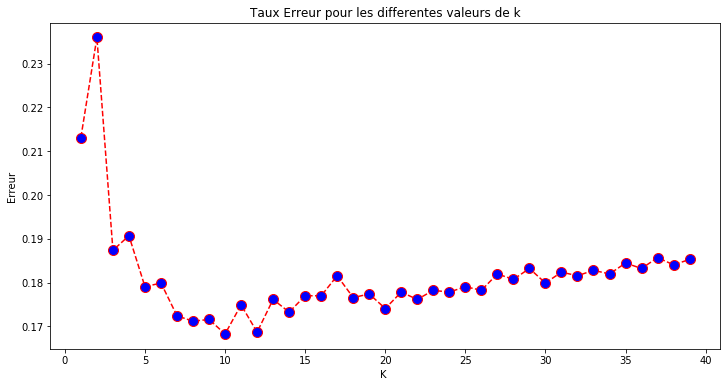

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []# Calculer l'erreur pour k entre 1 et 40 : la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [ ]:
#K = 10
knn = KNeighborsClassifier(10)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

__V- Evaluation__

Indicateurs de performance: Taux de bonne de classification, Précision, Rappel et matrice de confusion

*Utiliser grid search pour améliorer le résultat*

In [ ]:
#1-accuracy = 0.83 (%testset)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

#2-Précision = 0.81
#3-Recall = 0.83
#4-f1-score = 0.80
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

#5-Matrice de confusion
from sklearn.metrics import confusion_matrix
print('matrice de confusion : \n',confusion_matrix(y_test, y_pred_knn))


Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.83
              precision    recall  f1-score   support

           0       0.65      0.33      0.44       496
           1       0.85      0.95      0.90      1911

    accuracy                           0.83      2407
   macro avg       0.75      0.64      0.67      2407
weighted avg       0.81      0.83      0.80      2407

matrice de confusion : 
 [[ 164  332]
 [  89 1822]]


In [ ]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 14


In [ ]:
#grille_search_cv
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [7,8,9,10],#possibilité de k
    'metric': ['euclidean','manhattan']#methode de calcul de distance
}

grid = GridSearchCV(KNeighborsClassifier(),
                   grid_params,
                   verbose=1,
                   cv=5,
                   n_jobs=-1)
#grid.get_params().keys()

grid_result = grid.fit(X_train,y_train)

prediction=grid.predict(X_test)

score=grid.score(X_test,y_test)
score

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.0s finished


0.8317407561279602